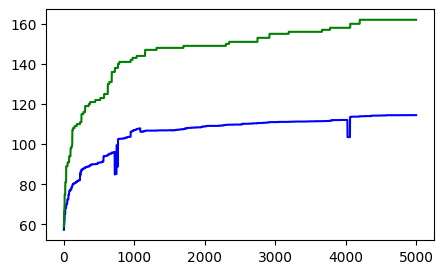

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("save.csv", sep=';')

plt.figure(figsize=(5,3))
plt.plot(df['epoch'], df['avg'], label='avg', color='blue')
plt.plot(df['epoch'], df['max'], label='max', color='green')

plt.show()